## Using Yellow Brick to Explore and Model the Famous Iris Dataset

Exploration Notebook by:
Nathan Danielsen
Prema Damodaran

## Review of the iris dataset

In [1]:
# read the iris data into a DataFrame
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [2]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Terminology

- **150 observations** (n=150): each observation is one iris flower
- **4 features** (p=4): sepal length, sepal width, petal length, and petal width
- **Response**: iris species
- **Classification problem** since response is categorical

## Lightly Preprocess the Dataset

In [ ]:
# map each iris species to a number
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

## Import the Good Stuff

In [128]:
import yellowbrick as yb 
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 8)

from yellowbrick.features.rankd import Rank2D
from yellowbrick.features.radviz import RadViz
from yellowbrick.features.pcoords import ParallelCoordinates

# Feature Exploration with RadViz

In [26]:
# Specify the features of interest and the classes of the target

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Extract the numpy arrays from the data frame
X = iris[features].as_matrix()
y = iris.species_num.as_matrix()

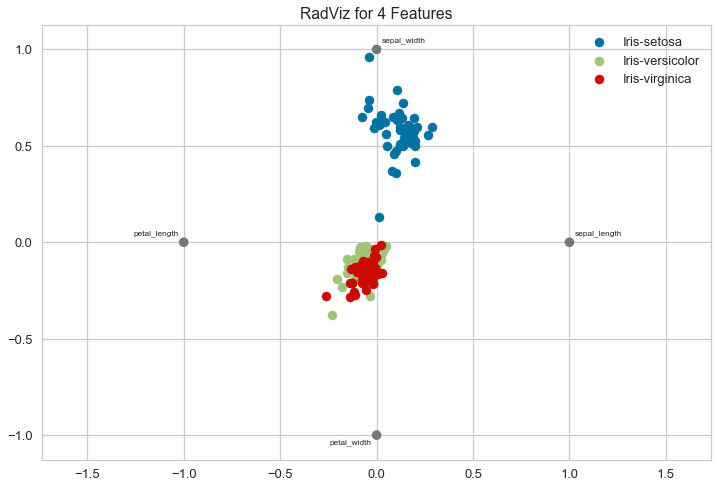

In [32]:
visualizer = RadViz(classes=classes, features=features)
visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof()         # Draw/show/poof the data

Setosas tend to have the largest septal-width. This can could be a great predictor.

Then, let's remove setosa from the training set and see fi we can find any differentiation between veriscolor and virginica.

### Remove Setosa from the training set

In [141]:
# Specify the features of interest and the classes of the target
iris_subset = iris[iris.species_num!=0]
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
classes = ['Iris-setosa','Iris-versicolor', 'Iris-virginica'] # but have to leave in more than two classes 

# Extract the numpy arrays from the data frame
X = iris_subset[features].as_matrix()
y = iris_subset.species_num.as_matrix()
assert y.shape[0] == X.shape[0]

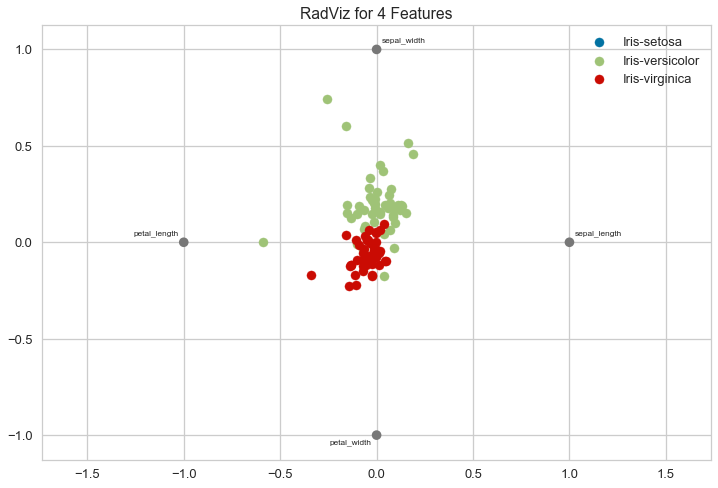

In [142]:
visualizer = RadViz(classes=classes, features=features)
visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof()         # Draw/show/poof the data

### Try the Covariance Visualizer

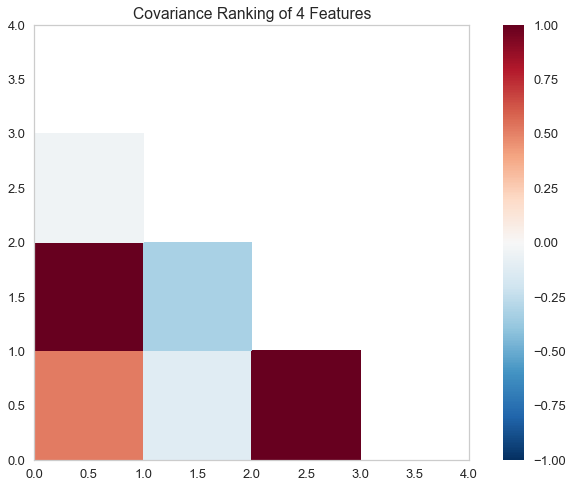

In [144]:
# Specify the features of interest and the classes of the target

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Extract the numpy arrays from the data frame
X = iris[features].as_matrix()
y = iris.species_num.as_matrix()

visualizer = Rank2D(features=features, algorithm='covariance')

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof()         # Draw/show/poof the data

This covariance chart is not intereptatble as they don't have labels. Also there shouldn't be half numbers in labels.


## More Feature Exploration: Look at Parallel Coodinates for all Species

In [63]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Extract the numpy arrays from the data frame
X = iris[features].as_matrix()
y = iris.species_num.values
assert y.shape[0] == X.shape[0]

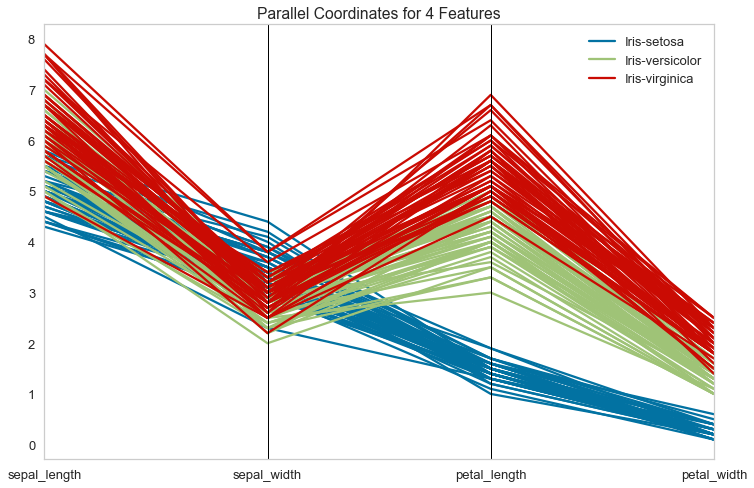

In [64]:
visualizer = ParallelCoordinates(classes=classes, features=features)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof()         # Draw/show/poof the data

This clearly demonstrates the separation between features - especially petal_length and petal_width. One concern is that this demonstraction data might be obsured by the scaling of the features and add noise to the intepretation.  

### Feature Exploration: ParallelCoordinates with Scaling

In [65]:
from sklearn import preprocessing

In [66]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Extract the numpy arrays from the data frame
X = iris[features].as_matrix()
X_scaled = preprocessing.scale(X)
y = iris.species_num.values
assert y.shape[0] == X.shape[0]

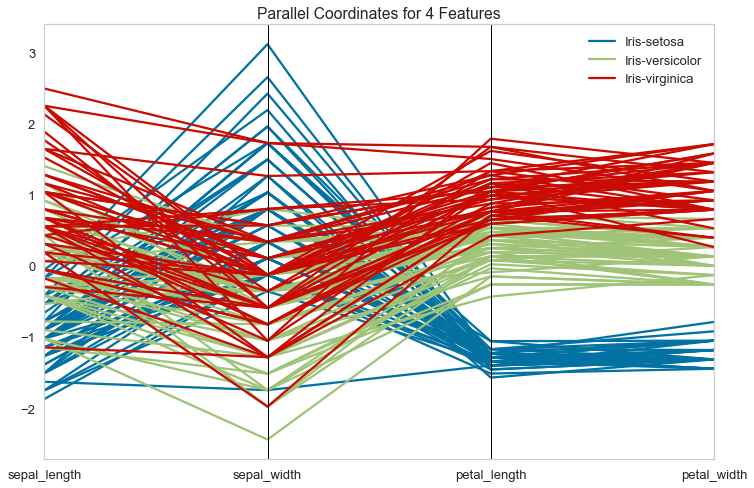

In [67]:
visualizer = ParallelCoordinates(classes=classes, features=features)

visualizer.fit(X_scaled, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof()       

The scaled dataset makes it easier to see the separation between classes for each of the features.

*TODO - Add scaling option to PararalCordinates and potentially other visualizers

## Now that we have some features, Let's Evaluate Classifiers

From the feature selection phase, we determined that petal_length and petal_width seem to have the best separation.

In [145]:
# Classifier Evaluation Imports

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

from yellowbrick.classifier import ClassificationReport, ClassBalance

In [146]:
features = ['petal_length', 'petal_width']
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Extract the numpy arrays from the data frame
X = iris[features].as_matrix()
y = iris.species_num.as_matrix()
assert y.shape[0] == X.shape[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
assert y_train.shape[0] == X_train.shape[0]
assert y_test.shape[0] == X_test.shape[0]

IndexError: list index out of range

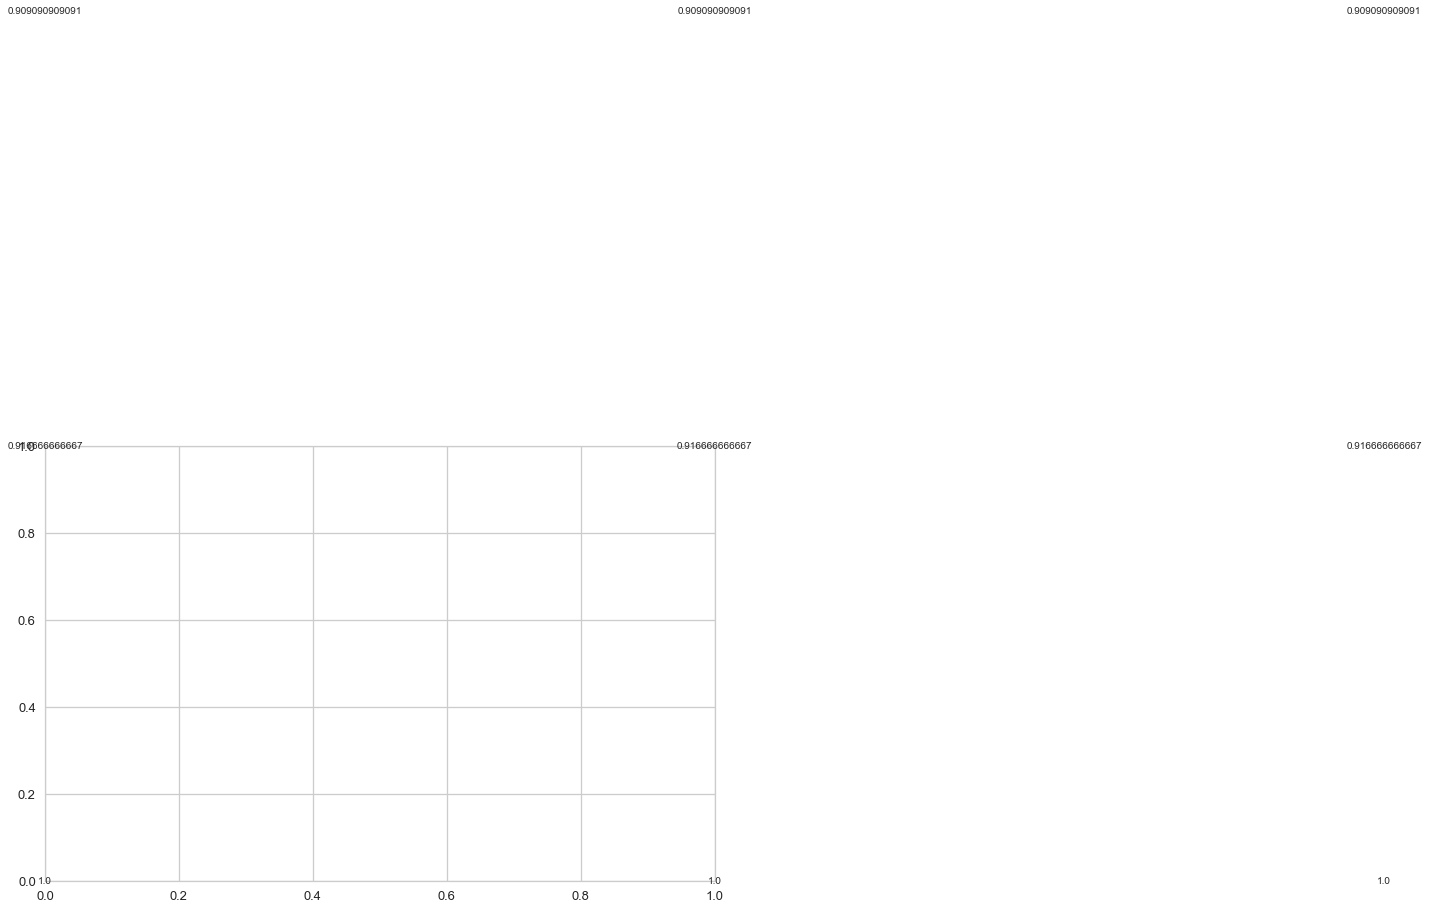

In [147]:
# Instantiate the classification model and visualizer
bayes = GaussianNB()
visualizer = ClassificationReport(bayes, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

In [96]:
visualizer

ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x10dedf7b8>,
           classes=None, model=None)

Note: There seems to be some sort of bug in the draw/ fit methods. 

## Let's try a naive bayes as the other didn't wrok

In [148]:
# Classifier Evaluation Imports

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

from yellowbrick.classifier import ClassificationReport, ClassBalance

In [149]:
features = ['petal_length', 'petal_width']
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Extract the numpy arrays from the data frame
X = iris[features].as_matrix()
y = iris.species_num.as_matrix()
assert y.shape[0] == X.shape[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
assert y_train.shape[0] == X_train.shape[0]
assert y_test.shape[0] == X_test.shape[0]

/usr/local/var/pyenv/versions/3.5.2/envs/yellowbrick/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


IndexError: list index out of range

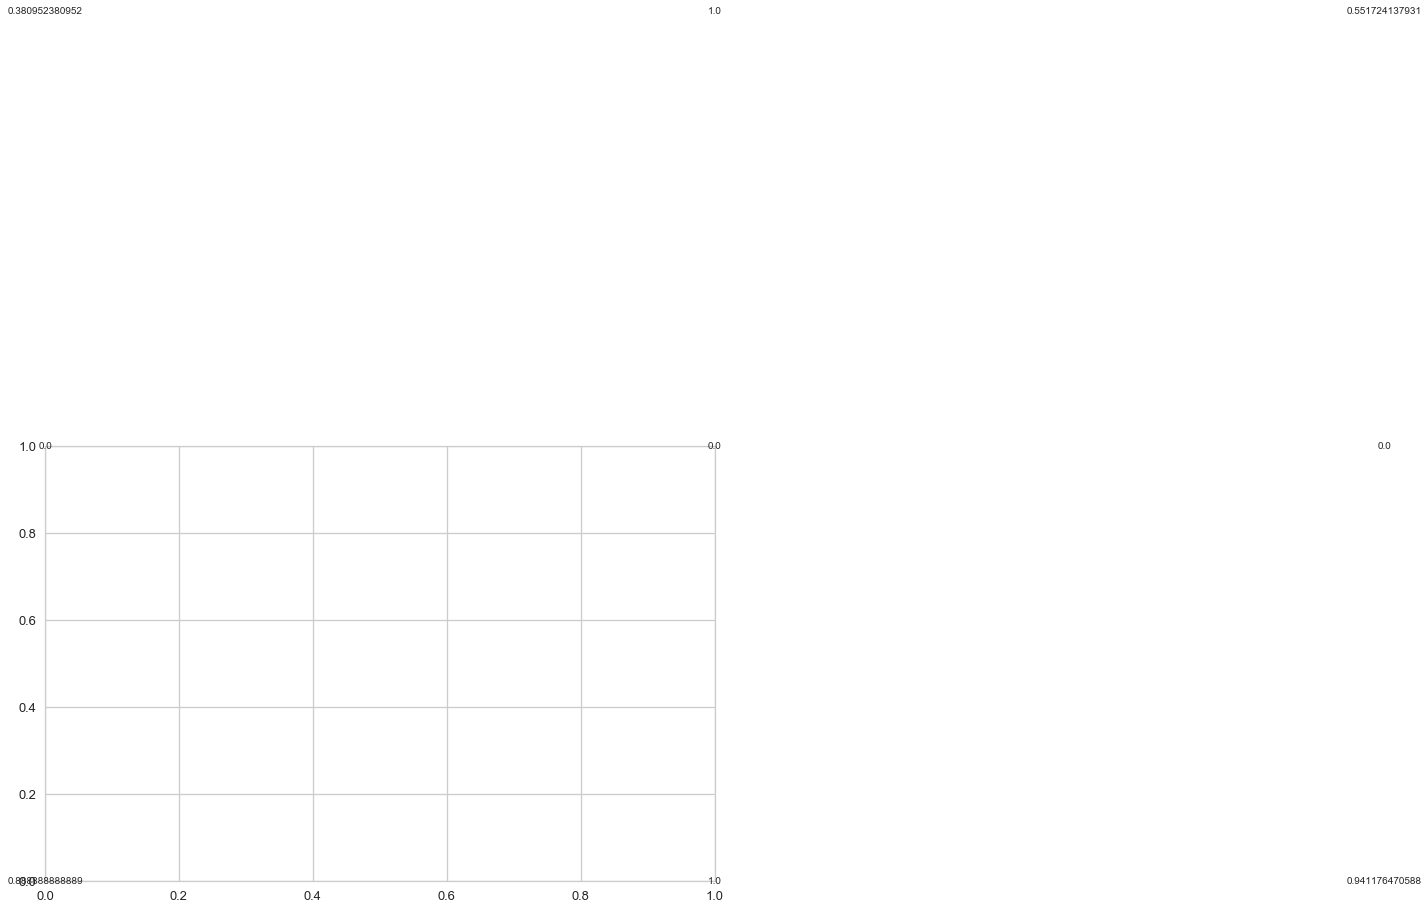

In [151]:
# Instantiate the classification model and visualizer
bayes = MultinomialNB()
visualizer = ClassificationReport(bayes)# classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

## Model Selection: Random Forest Classification

In [108]:
features = ['petal_length', 'petal_width']
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Extract the numpy arrays from the data frame
X = iris[features].as_matrix()
y = iris.species_num.as_matrix()
assert y.shape[0] == X.shape[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
assert y_train.shape[0] == X_train.shape[0]
assert y_test.shape[0] == X_test.shape[0]

In [115]:
test = pd.DataFrame(y_test, columns=['species'])

In [131]:
test.species.value_counts() # The test train split provides unbalanced classes

1    13
0    11
2     6
Name: species, dtype: int64

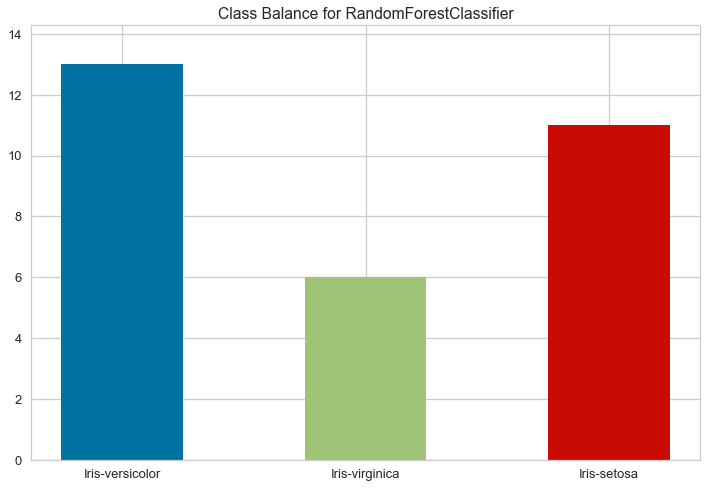

In [132]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassificationReport

# Instantiate the classification model and visualizer
forest = RandomForestClassifier()
visualizer = ClassBalance(forest, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

Note: The visualization works, but the example provides an unbalanced training/ testing set that provides a misleading for a Randomforest classifier. A more powerful example would train with balanced classes.